<a href="https://colab.research.google.com/github/ShayanRiyaz/Rice-Crop-Disease-Detection/blob/master/experimental_notebooks/rice-crop-disease-detection-tf-v2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries <a name="ImportingLibraries"></a>

In [ ]:
!pip install tensorflow==2.3.0 -q

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import PIL


In [ ]:

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:',tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_systems(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

print(tf.__version__)

Number of replicas: 1
2.3.0


# Loading Dataset <a name="LoadingDataset"></a>

In [ ]:
#!/usr/bin/python

import os, sys

# Create new Train and val folders

base_dir = 'kaggle/input/RiceLeafs'
train_path = '/kaggle/input/RiceLeafs/train'
val_path = 'kaggle/input/RiceLeafs/validation/'

column_names = os.listdir(train_path)
for i in column_names:
    os.makedirs(f'../kaggle/output/train/{i}')
    os.makedirs(f'../kaggle/output/validation/{i}')

out_path = '../kaggle/output/train/'




# Resizing Image  <a name="Resize"></a>

In [ ]:
from PIL import Image
def resize(input_path,folder,column_name):
    dirs = os.listdir(input_path)
    for item in dirs:
        item_path = input_path +'/' +item
        if os.path.isfile(item_path):
            #print('CHECK')
            im = Image.open(item_path)

            # Check whether the specified 
            # path exists or not 
            outpath = f'/kaggle/kaggle/output/{folder}/{column_name}'
            temp_out_path = outpath+'/'+item
            f, e = os.path.splitext(temp_out_path)

            imResize = im.resize((150,150), Image.ANTIALIAS)
            #print('CHECK 3')
            imResize.save(f + '.jpg', 'JPEG', quality=90)





In [ ]:
input_path = '../input/RiceLeafs/train/Healthy'
folder = 'train'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/train/BrownSpot'
folder = 'train'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/train/Hispa'
folder = 'train'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/train/LeafBlast'
folder = 'train'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with train resizing')

Done with train resizing


In [ ]:
## VALIDATION
input_path = '../input/RiceLeafs/validation/Healthy'
folder = 'validation'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/validation/BrownSpot'
folder = 'validation'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/validation/Hispa'
folder = 'validation'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = '../input/RiceLeafs/validation/LeafBlast'
folder = 'validation'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with Validation resizing')

Done with Validation resizing


In [ ]:
os.path.exists('/kaggle/kaggle/output/validation/Healthy/')

True

In [ ]:
os.path.exists('/kaggle/kaggle/output/train/')
os.path.exists('/kaggle/kaggle/output/validation/')


True

In [ ]:
os.listdir('/kaggle/kaggle/output/train/BrownSpot/')

['IMG_20190420_194445.jpg',
 'IMG_20190424_133840.jpg',
 'IMG_20190421_195243.jpg',
 'IMG_3229.jpg',
 'IMG_20190420_190604.jpg',
 'IMG_20190420_195309.jpg',
 'IMG_20190424_134124.jpg',
 'IMG_20190420_191027.jpg',
 'IMG_20190420_193914.jpg',
 'IMG_3239.jpg',
 'IMG_20190424_125939.jpg',
 'IMG_20190420_194429.jpg',
 'IMG_3069.jpg',
 'IMG_20190421_195701.jpg',
 'IMG_20190420_193741.jpg',
 'IMG_20190424_131059.jpg',
 'IMG_20190420_193236.jpg',
 'IMG_20190420_200330.jpg',
 'IMG_20190420_195413.jpg',
 'IMG_20190420_195219.jpg',
 'IMG_3225.jpg',
 'IMG_20190420_190248.jpg',
 'IMG_20190420_195256.jpg',
 'IMG_20190420_194504_1.jpg',
 'IMG_20190420_193818.jpg',
 'IMG_20190420_190445.jpg',
 'IMG_20190420_193917.jpg',
 'IMG_3178.jpg',
 'IMG_20190420_194159.jpg',
 'IMG_20190420_194619.jpg',
 'IMG_20190420_190617.jpg',
 'IMG_20190420_190902.jpg',
 'IMG_20190420_195410.jpg',
 'IMG_20190420_194447_1.jpg',
 'IMG_20190420_193633.jpg',
 'IMG_20190420_190623.jpg',
 'IMG_20190421_200132.jpg',
 'IMG_3073.jpg'

In [ ]:
data_dir = os.path.join(os.path.dirname('/kaggle/kaggle/'), 'output')

# Training and Validation Split  <a name="Split"></a>

In [ ]:
# Use this if you avoided the resizing
#data_dir = os.path.join(os.path.dirname('../input/'), 'riceleafs/RiceLeafs')

In [ ]:
train_dir = os.path.join(data_dir, 'train')
train_BrownSpot_dir = os.path.join(train_dir, 'BrownSpot')
train_Healthy_dir = os.path.join(train_dir, 'Healthy')
train_Hispa_dir = os.path.join(train_dir, 'Hispa')
train_LeafBlast_dir = os.path.join(train_dir, 'LeafBlast')


validation_dir = os.path.join(data_dir, 'validation')
validation_BrownSpot_dir = os.path.join(validation_dir, 'BrownSpot')
validation_Healthy_dir = os.path.join(validation_dir, 'Healthy')
validation_Hispa_dir = os.path.join(validation_dir, 'Hispa')
validation_LeafBlast_dir = os.path.join(validation_dir, 'LeafBlast')

In [ ]:
train_BrownSpot_names = os.listdir(train_BrownSpot_dir)
print(train_BrownSpot_names[:10])

train_Healthy_names =  os.listdir(train_Healthy_dir)
print(train_Healthy_names[:10])

train_Hispa_names = os.listdir(train_Hispa_dir)
print(train_Hispa_names[:10])

train_LeafBlast_names =  os.listdir(train_LeafBlast_dir)
print(train_LeafBlast_names[:10])

['IMG_20190420_194445.jpg', 'IMG_20190424_133840.jpg', 'IMG_20190421_195243.jpg', 'IMG_3229.jpg', 'IMG_20190420_190604.jpg', 'IMG_20190420_195309.jpg', 'IMG_20190424_134124.jpg', 'IMG_20190420_191027.jpg', 'IMG_20190420_193914.jpg', 'IMG_3239.jpg']
['IMG_20190419_133951.jpg', 'IMG_20190419_162646.jpg', 'IMG_20190424_133152.jpg', 'IMG_20190419_125021.jpg', 'IMG_20190419_175230.jpg', 'IMG_20190419_174552.jpg', 'IMG_20190419_144440.jpg', 'IMG_20190419_163953.jpg', 'IMG_20190419_161525.jpg', 'IMG_20190419_151403.jpg']
['IMG_20190419_172802.jpg', 'IMG_20190419_161916.jpg', 'IMG_20190419_144249.jpg', 'IMG_20190419_145553.jpg', 'IMG_20190419_161920.jpg', 'IMG_20190419_144857.jpg', 'IMG_20190419_153215.jpg', 'IMG_20190419_173042.jpg', 'IMG_20190420_194340.jpg', 'IMG_20190419_173050.jpg']
['IMG_20190419_171022.jpg', 'IMG_20190419_141243.jpg', 'IMG_20190420_193158.jpg', 'IMG_20190419_175210.jpg', 'IMG_20190419_175430.jpg', 'IMG_20190419_123733.jpg', 'IMG_20190419_172831.jpg', 'IMG_20190420_19112

## Image Count <a name="ImageCount"></a>

In [ ]:

import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"

print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /kaggle/kaggle/output/train : 2684 files
total images for validation : /kaggle/kaggle/output/validation : 671 files


## Viewing Images  <a name="ViewingImages"></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Parameters for our graph; we'll outpu images in a 4x4 configuration
nrows = 4
ncols = 4

# for iternating over images
pic_index = 0

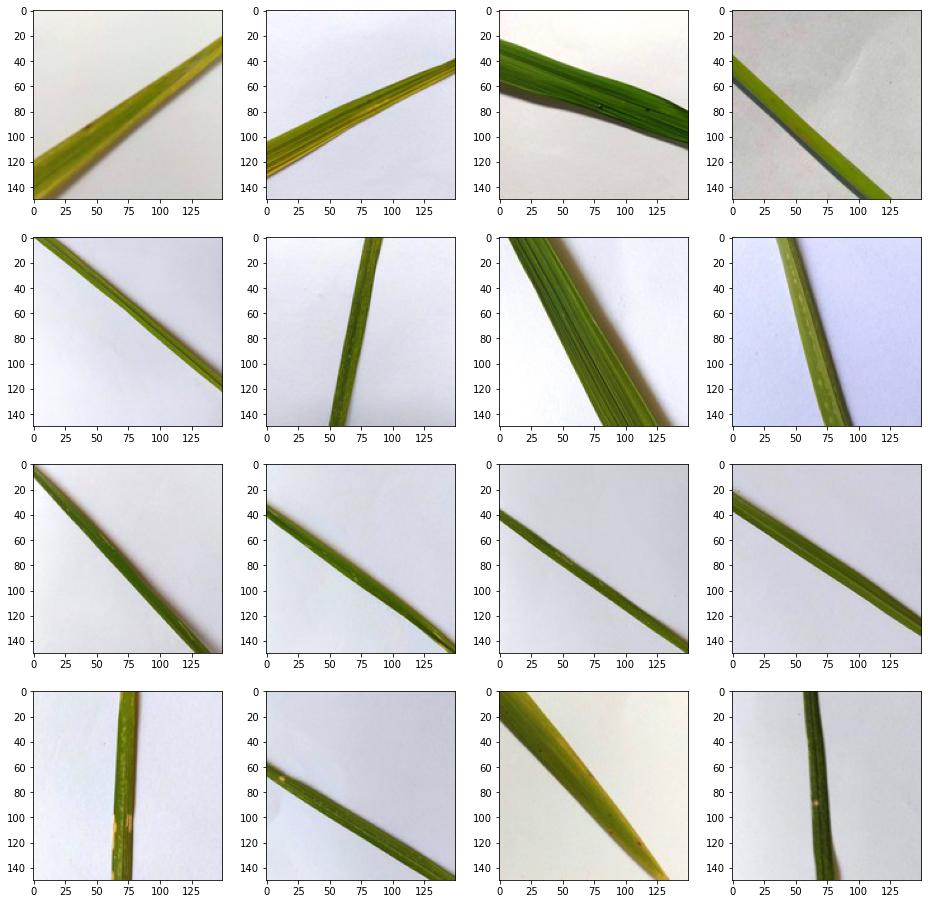

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 4
next_BrownSpot_pix = [os.path.join(train_BrownSpot_dir, fname)
                for fname in train_BrownSpot_names[pic_index-4:pic_index]]

next_Healthy_pix = [os.path.join(train_Healthy_dir, fname)
                for fname in train_Healthy_names[pic_index-4:pic_index]]

next_Hispa_pix = [os.path.join(train_Hispa_dir, fname)
                for fname in train_Hispa_names[pic_index-4:pic_index]]

next_LeafBlast_pix = [os.path.join(train_LeafBlast_dir, fname)
                for fname in train_LeafBlast_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_BrownSpot_pix + next_Healthy_pix + next_Hispa_pix + next_LeafBlast_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Generators <a name="DataAugAndGen"></a>

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
EPOCHS = 100
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32 * strategy.num_replicas_in_sync

NameError: name 'tf' is not defined

In [ ]:
print(strategy.num_replicas_in_sync)

1


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_ds = ImageDataGenerator(
# rescale = 1./255,
# width_shift_range= 0.2,
# height_shift_range = 0.2,
# shear_range = 0.4,
# rotation_range = 40,
# horizontal_flip = True,
# fill_mode = 'nearest')

training_generator = image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 220,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    #class_mode = 'categorical'
)

# validation_ds = ImageDataGenerator(
#             rescale = 1./255)

validation_generator = image_dataset_from_directory(
        validation_dir,
        validation_split = 0.2,
        subset = 'validation',
        seed = 220,
        batch_size = BATCH_SIZE,
        image_size = IMAGE_SIZE,
        )

Found 2684 files belonging to 4 classes.
Using 2148 files for training.
Found 671 files belonging to 4 classes.
Using 134 files for validation.


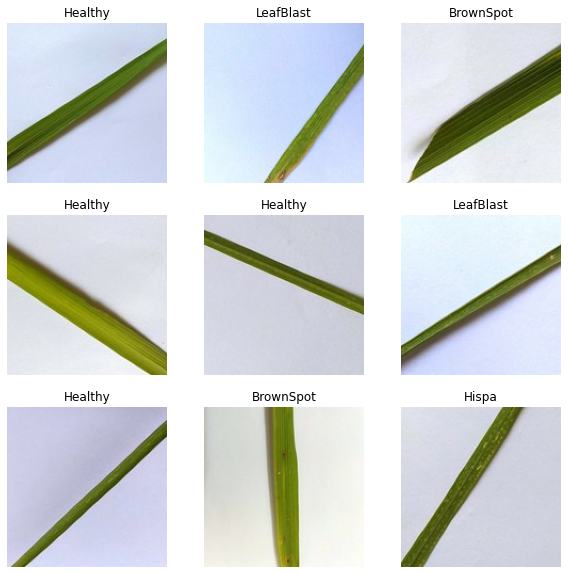

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_generator.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(training_generator.class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names = os.listdir(train_dir)

print(class_names)

training_generator.class_names = class_names
validation_generator.class_names = class_names

NUM_CLASSES = len(class_names)

['BrownSpot', 'LeafBlast', 'Hispa', 'Healthy']


# Feature Engineering

In [ ]:
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = training_generator.map(one_hot_label, num_parallel_calls=AUTOTUNE)
val_ds = validation_generator.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Build the Model

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters,3,activation = 'relu',padding = 'same'),
        tf.keras.layers.SeparableConv2D(filters,3,activation = 'relu',padding = 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    return block

In [ ]:
def dense_block(units,dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units,activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    return block

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE,3)),
        tf.keras.layers.Conv2D(16,3,activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        #conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        
        #dense_block(512,0.7),
        dense_block(128,0.5),
        dense_block(64,0.3),
        
        tf.keras.layers.Dense(NUM_CLASSES,activation = 'softmax')
            ])
    return model


In [ ]:
with strategy.scope():
    model = build_model()
    
    METRICS = [tf.keras.metrics.AUC(name='auc')]
    
    model.compile(
    optimizer = 'adam',
    loss = tf.losses.CategoricalCrossentropy(),
    metrics = METRICS
    )

# Training the Model

In [ ]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch/s) 
    return exponential_decay_fn


exponential_decay_fn = exponential_decay(0.001,20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('Alzheimer_model.h5',
                                                  save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                    restore_best_weights = True)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
    epochs=EPOCHS
)

Epoch 1/100
34/34 [==============================] - 5s 136ms/step - loss: 1.6761 - auc: 0.6305 - val_loss: 1.3488 - val_auc: 0.5940
Epoch 2/100
34/34 [==============================] - 4s 122ms/step - loss: 1.3180 - auc: 0.7316 - val_loss: 1.3381 - val_auc: 0.5733
Epoch 3/100
34/34 [==============================] - 4s 116ms/step - loss: 1.1746 - auc: 0.7803 - val_loss: 1.3531 - val_auc: 0.5878
Epoch 4/100
34/34 [==============================] - 4s 122ms/step - loss: 1.1460 - auc: 0.7841 - val_loss: 1.3579 - val_auc: 0.6030
Epoch 5/100
34/34 [==============================] - 4s 120ms/step - loss: 1.0564 - auc: 0.8143 - val_loss: 1.4125 - val_auc: 0.5449
Epoch 6/100
34/34 [==============================] - 4s 118ms/step - loss: 1.0598 - auc: 0.8145 - val_loss: 1.5367 - val_auc: 0.5809
Epoch 7/100
34/34 [==============================] - 4s 115ms/step - loss: 0.9836 - auc: 0.8373 - val_loss: 1.6042 - val_auc: 0.5347
Epoch 8/100
34/34 [==============================] - 4s 116ms/step - 

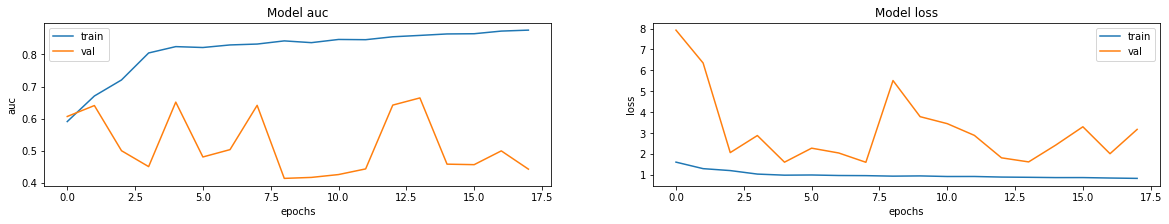

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

#### TensorFlow Hub Dataset
- [EfficientNet B7](https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1)